In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json
%matplotlib inline
np.set_printoptions(precision=4)

In [2]:
load_path = '../results_time_split/'
# load training
train_precision_epoch_array = np.load(load_path+'train_precision_epoch_array.npy')    # nEpoch * 3
train_recall_epoch_array = np.load(load_path+'train_recall_epoch_array.npy')          # nEpoch * 3
train_regret_epoch_array = np.load(load_path+'train_regret_epoch_array.npy')          # nEpoch * 1
save_class_matrix_train = np.load(load_path+'save_class_matrix_train.npy')            # [3 x 3]
# load the validation
valid_precision_epoch_array = np.load(load_path+'valid_precision_epoch_array.npy')
valid_recall_epoch_array = np.load(load_path+'valid_recall_epoch_array.npy') 
valid_regret_epoch_array = np.load(load_path+'valid_regret_epoch_array.npy') 
save_class_matrix_valid = np.load(load_path+'save_class_matrix_valid.npy') 
# load the testing
test_precision_epoch_array = np.load(load_path+'test_precision_epoch_array.npy')
test_recall_epoch_array = np.load(load_path+'test_recall_epoch_array.npy') 
test_regret_epoch_array = np.load(load_path+'test_regret_epoch_array.npy') 
save_class_matrix_test = np.load(load_path+'save_class_matrix_test.npy') 

In [3]:
epoch_ind = np.arange(train_precision_epoch_array.shape[0])+1

## Print the infor for documentation

In [4]:
print('Upon converge, the information will be:')
print('****************Training Data******************')
print('Non-trend: recall: ',round(train_recall_epoch_array[-1,0],4),' precision: ',round(train_precision_epoch_array[-1,0],4))
print('Up-trend: recall: ',round(train_recall_epoch_array[-1,2],4),' precision: ',round(train_precision_epoch_array[-1,2],4))
print('Down-trend: recall: ',round(train_recall_epoch_array[-1,1],4),' precision: ',round(train_precision_epoch_array[-1,1],4))
print('Regret: ', round(train_regret_epoch_array[-1],4))
print('****************Validation Data******************')
print('Non-trend: recall: ',round(valid_recall_epoch_array[-1,0],4),' precision: ',round(valid_precision_epoch_array[-1,0],4))
print('Up-trend: recall: ',round(valid_recall_epoch_array[-1,2],4),' precision: ',round(valid_precision_epoch_array[-1,2],4))
print('Down-trend: recall: ',round(valid_recall_epoch_array[-1,1],4),' precision: ',round(valid_precision_epoch_array[-1,1],4))
print('Regret: ', round(valid_regret_epoch_array[-1],4))
print('****************Testing Data******************')
print('Non-trend: recall: ',round(test_recall_epoch_array[-1,0],4),' precision: ',round(test_precision_epoch_array[-1,0],4))
print('Up-trend: recall: ',round(test_recall_epoch_array[-1,2],4),' precision: ',round(test_precision_epoch_array[-1,2],4))
print('Down-trend: recall: ',round(test_recall_epoch_array[-1,1],4),' precision: ',round(test_precision_epoch_array[-1,1],4))
print('Regret: ', round(test_regret_epoch_array[-1],4))

Upon converge, the information will be:
****************Training Data******************
Non-trend: recall:  0.659  precision:  0.5781
Up-trend: recall:  0.2013  precision:  0.293
Down-trend: recall:  0.144  precision:  0.1343
Regret:  0.611
****************Validation Data******************
Non-trend: recall:  0.7078  precision:  0.6217
Up-trend: recall:  0.2032  precision:  0.27
Down-trend: recall:  0.1084  precision:  0.1328
Regret:  0.5445
****************Testing Data******************
Non-trend: recall:  0.7271  precision:  0.5683
Up-trend: recall:  0.1614  precision:  0.286
Down-trend: recall:  0.1086  precision:  0.1435
Regret:  0.5728


## Plot the precision of three classes

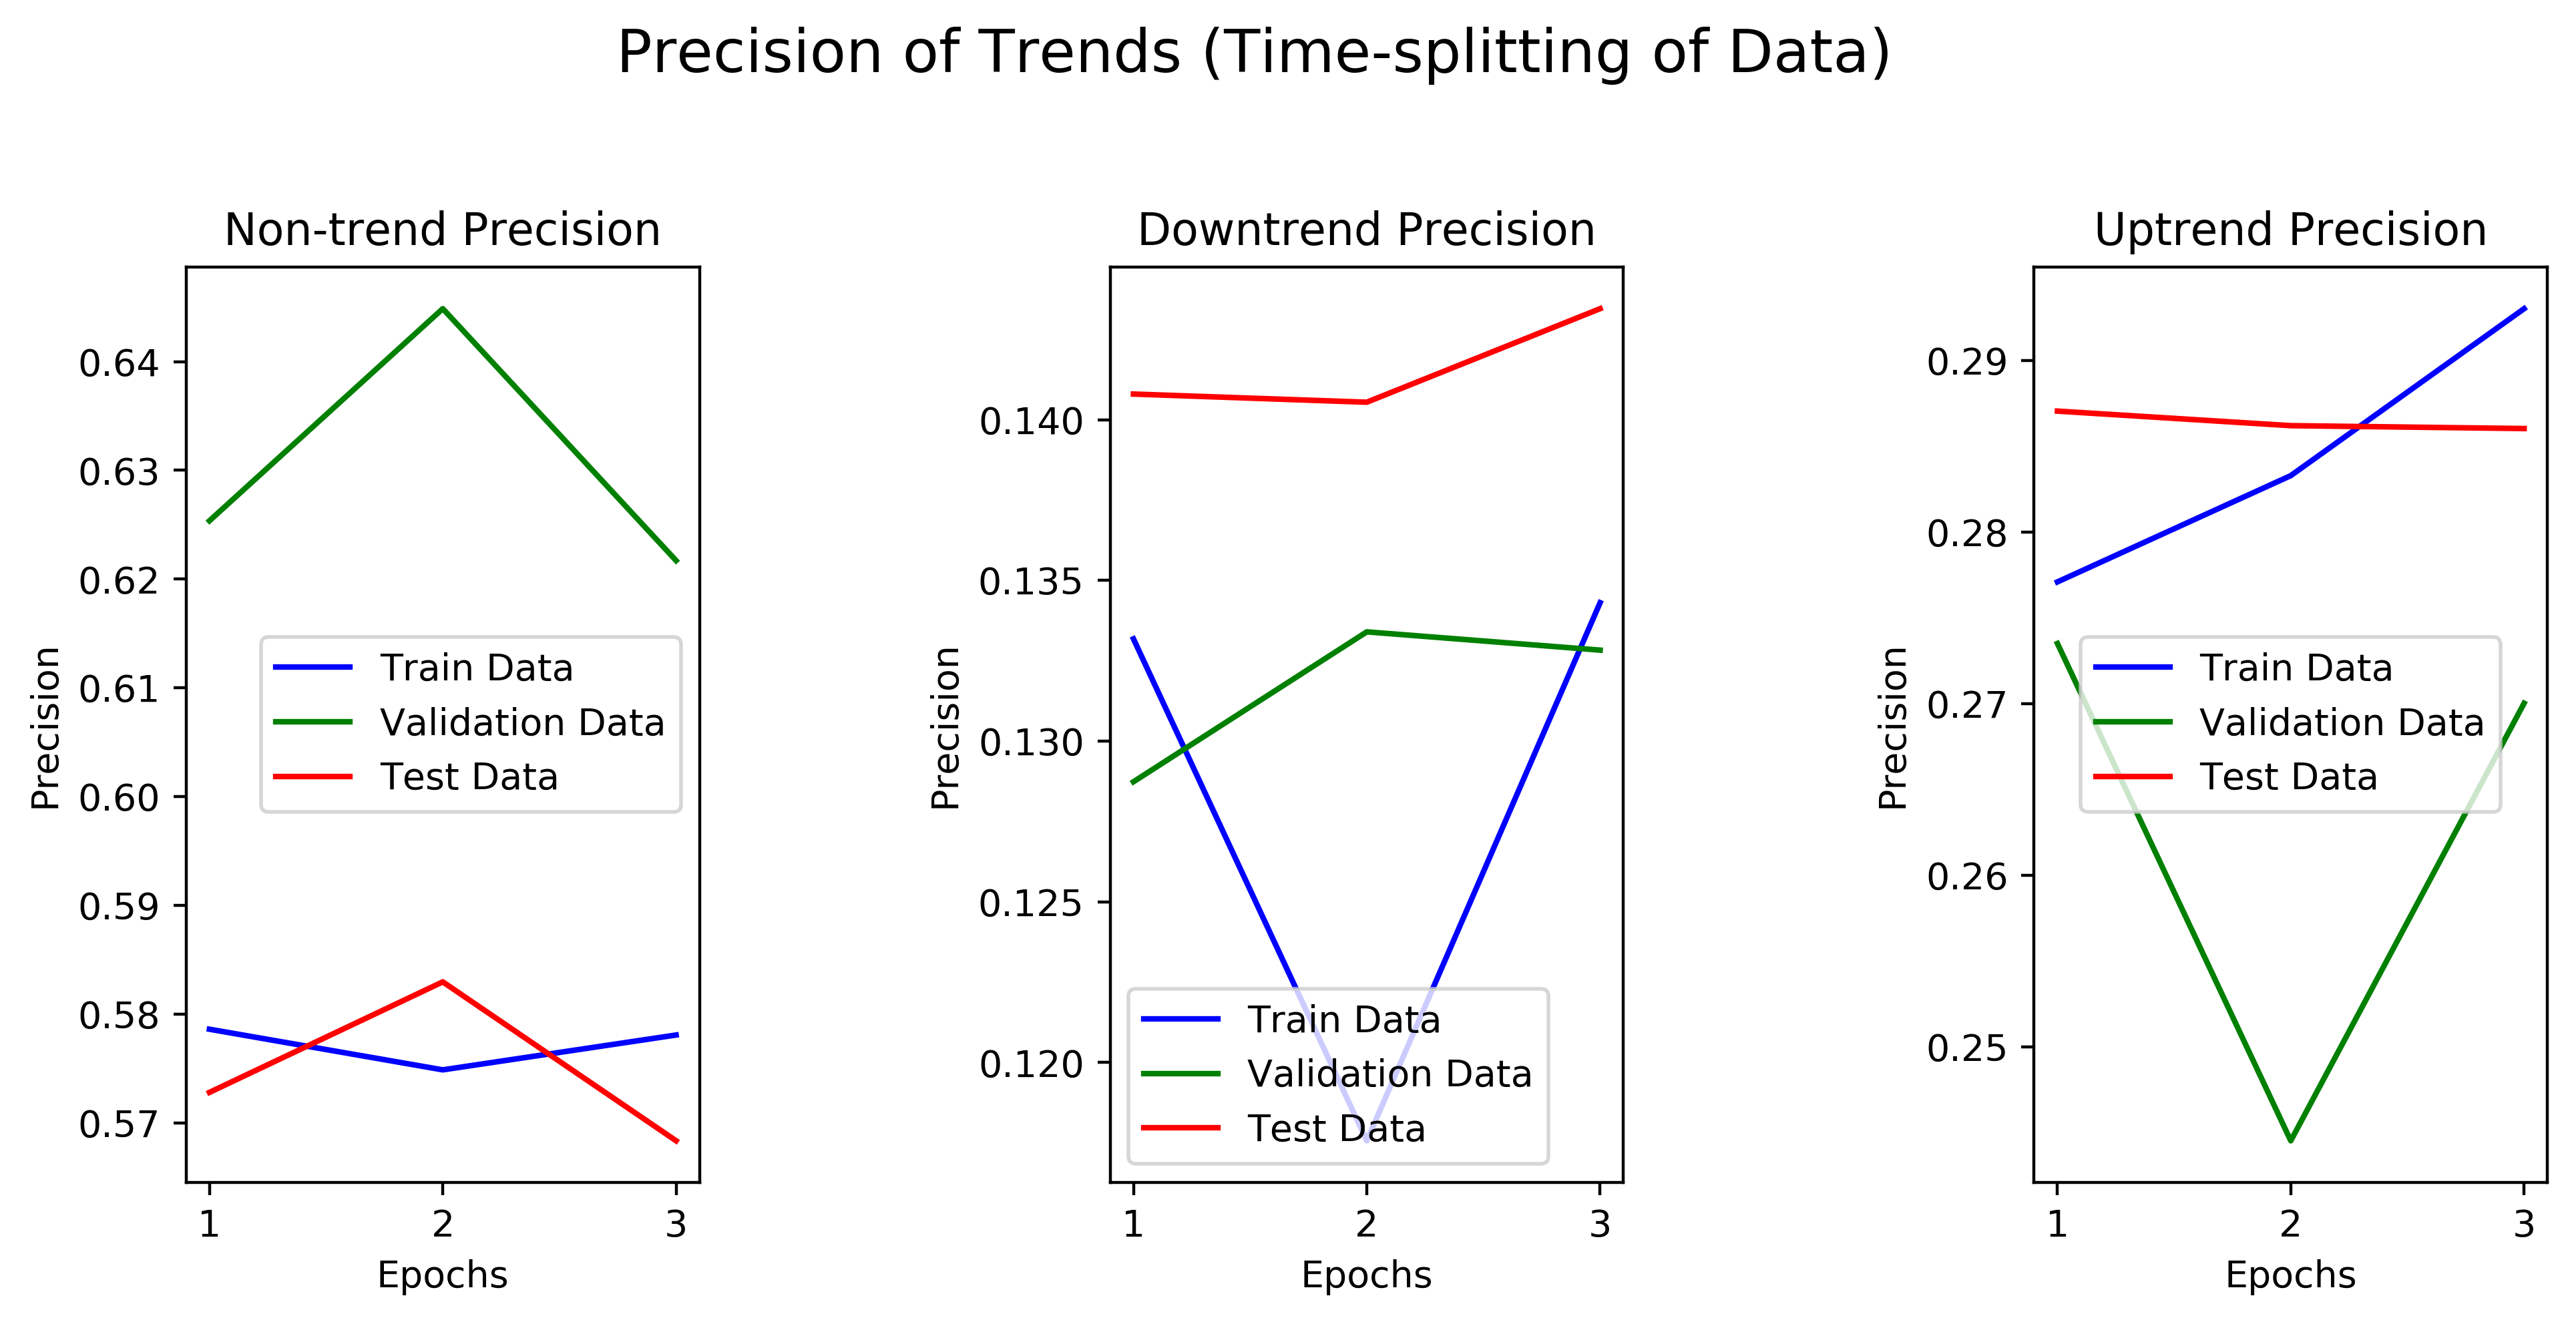

In [5]:
plt.figure(figsize=(10,5),dpi=400)
# plain CNN
ax = plt.subplot(1,3,1)
ax.set_title('Non-trend Precision')
non_trend_train_plot, = ax.plot(epoch_ind,train_precision_epoch_array[:,0],'b-')
non_trend_valid_plot, = ax.plot(epoch_ind,valid_precision_epoch_array[:,0],'g-')
non_trend_test_plot, = ax.plot(epoch_ind,test_precision_epoch_array[:,0],'r-')
ax.legend([non_trend_train_plot,non_trend_valid_plot,non_trend_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
plt.suptitle('Precision of Trends (Time-splitting of Data)',fontsize=16)
# Loss=sensitive CNN
ax = plt.subplot(1,3,2)
ax.set_title('Downtrend Precision')
down_trend_train_plot, = ax.plot(epoch_ind,train_precision_epoch_array[:,1],'b-')
down_trend_valid_plot, = ax.plot(epoch_ind,valid_precision_epoch_array[:,1],'g-')
down_trend_test_plot, = ax.plot(epoch_ind,test_precision_epoch_array[:,1],'r-')
ax.legend([down_trend_train_plot,down_trend_valid_plot,down_trend_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax = plt.subplot(1,3,3)
ax.set_title('Uptrend Precision')
up_trend_train_plot, = ax.plot(epoch_ind,train_precision_epoch_array[:,2],'b-')
up_trend_valid_plot, = ax.plot(epoch_ind,valid_precision_epoch_array[:,2],'g-')
up_trend_test_plot, = ax.plot(epoch_ind,test_precision_epoch_array[:,2],'r-')
ax.legend([up_trend_train_plot,up_trend_valid_plot,up_trend_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
plt.tight_layout()
plt.subplots_adjust(left=0.1,wspace=0.8,top=0.8)
plt.show()

## Plot the recall

In [6]:
test_recall_epoch_array

array([[0.6709, 0.3328, 0.0016],
       [0.1901, 0.5871, 0.2307],
       [0.7271, 0.1086, 0.1614]])

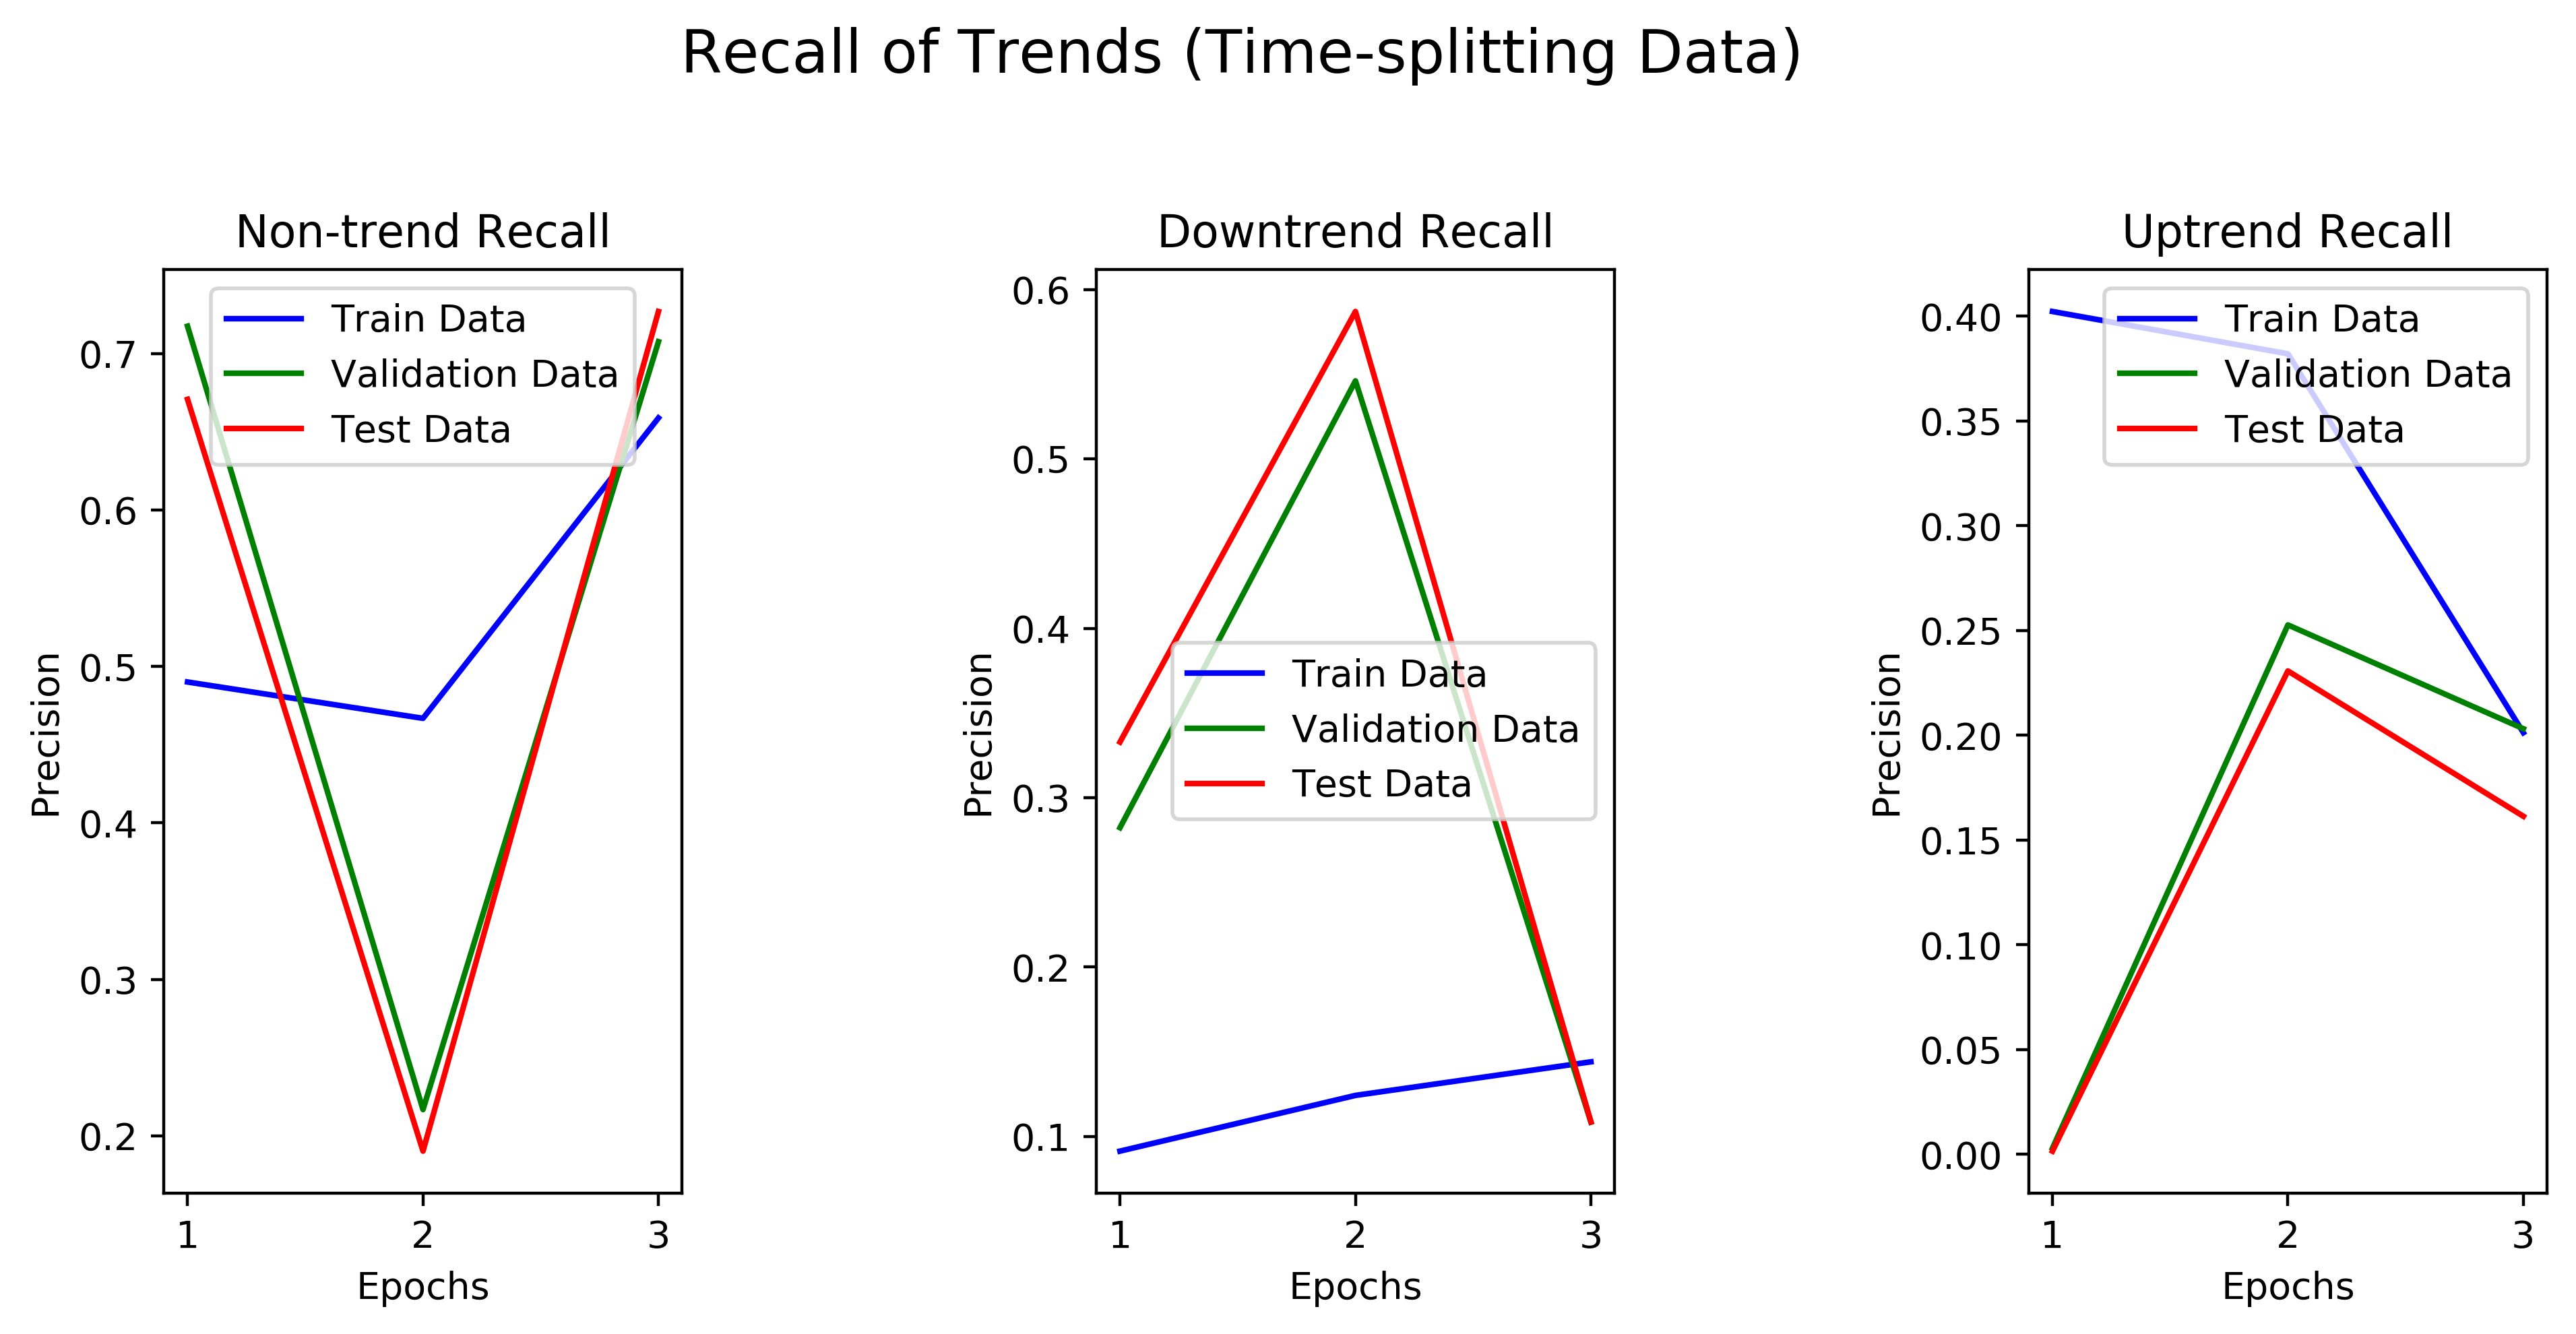

In [7]:
plt.figure(figsize=(10,5),dpi=400)
# plain CNN
ax = plt.subplot(1,3,1)
ax.set_title('Non-trend Recall')
non_trend_train_plot, = ax.plot(epoch_ind,train_recall_epoch_array[:,0],'b-')
non_trend_valid_plot, = ax.plot(epoch_ind,valid_recall_epoch_array[:,0],'g-')
non_trend_test_plot, = ax.plot(epoch_ind,test_recall_epoch_array[:,0],'r-')
ax.legend([non_trend_train_plot,non_trend_valid_plot,non_trend_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
plt.suptitle('Recall of Trends (Time-splitting Data)',fontsize=16)
# Loss=sensitive CNN
ax = plt.subplot(1,3,2)
ax.set_title('Downtrend Recall')
down_trend_train_plot, = ax.plot(epoch_ind,train_recall_epoch_array[:,1],'b-')
down_trend_valid_plot, = ax.plot(epoch_ind,valid_recall_epoch_array[:,1],'g-')
down_trend_test_plot, = ax.plot(epoch_ind,test_recall_epoch_array[:,1],'r-')
ax.legend([down_trend_train_plot,down_trend_valid_plot,down_trend_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
ax = plt.subplot(1,3,3)
ax.set_title('Uptrend Recall')
up_trend_train_plot, = ax.plot(epoch_ind,train_recall_epoch_array[:,2],'b-')
up_trend_valid_plot, = ax.plot(epoch_ind,valid_recall_epoch_array[:,2],'g-')
up_trend_test_plot, = ax.plot(epoch_ind,test_recall_epoch_array[:,2],'r-')
ax.legend([up_trend_train_plot,up_trend_valid_plot,up_trend_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Precision')
plt.tight_layout()
plt.subplots_adjust(left=0.1,wspace=0.8,top=0.8)
plt.show()

## Plotting the accuracy

In [8]:
# train_class_accuracy = np.array([0.3708818, 0.42839813, 0.46012518])
# test_class_accuracy = np.array([0.36978447, 0.4272943, 0.45848358])

In [9]:
# plt.figure(figsize=(10,5),dpi=400)
# # plain CNN
# ax = plt.subplot(1,1,1)
# non_trend_train_plot, = ax.plot(epoch_ind,train_class_accuracy,'b-')
# non_trend_test_plot, = ax.plot(epoch_ind,test_class_accuracy,'r-')
# ax.legend([non_trend_train_plot,non_trend_test_plot],['Train Data','Test Data'])
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Accuracy')
# plt.suptitle('Accuracy with respect to Epoch (Time-Splitting Data)',fontsize=16)
# plt.show()

## Plot the 'regret' w.r.t the number of Epochs

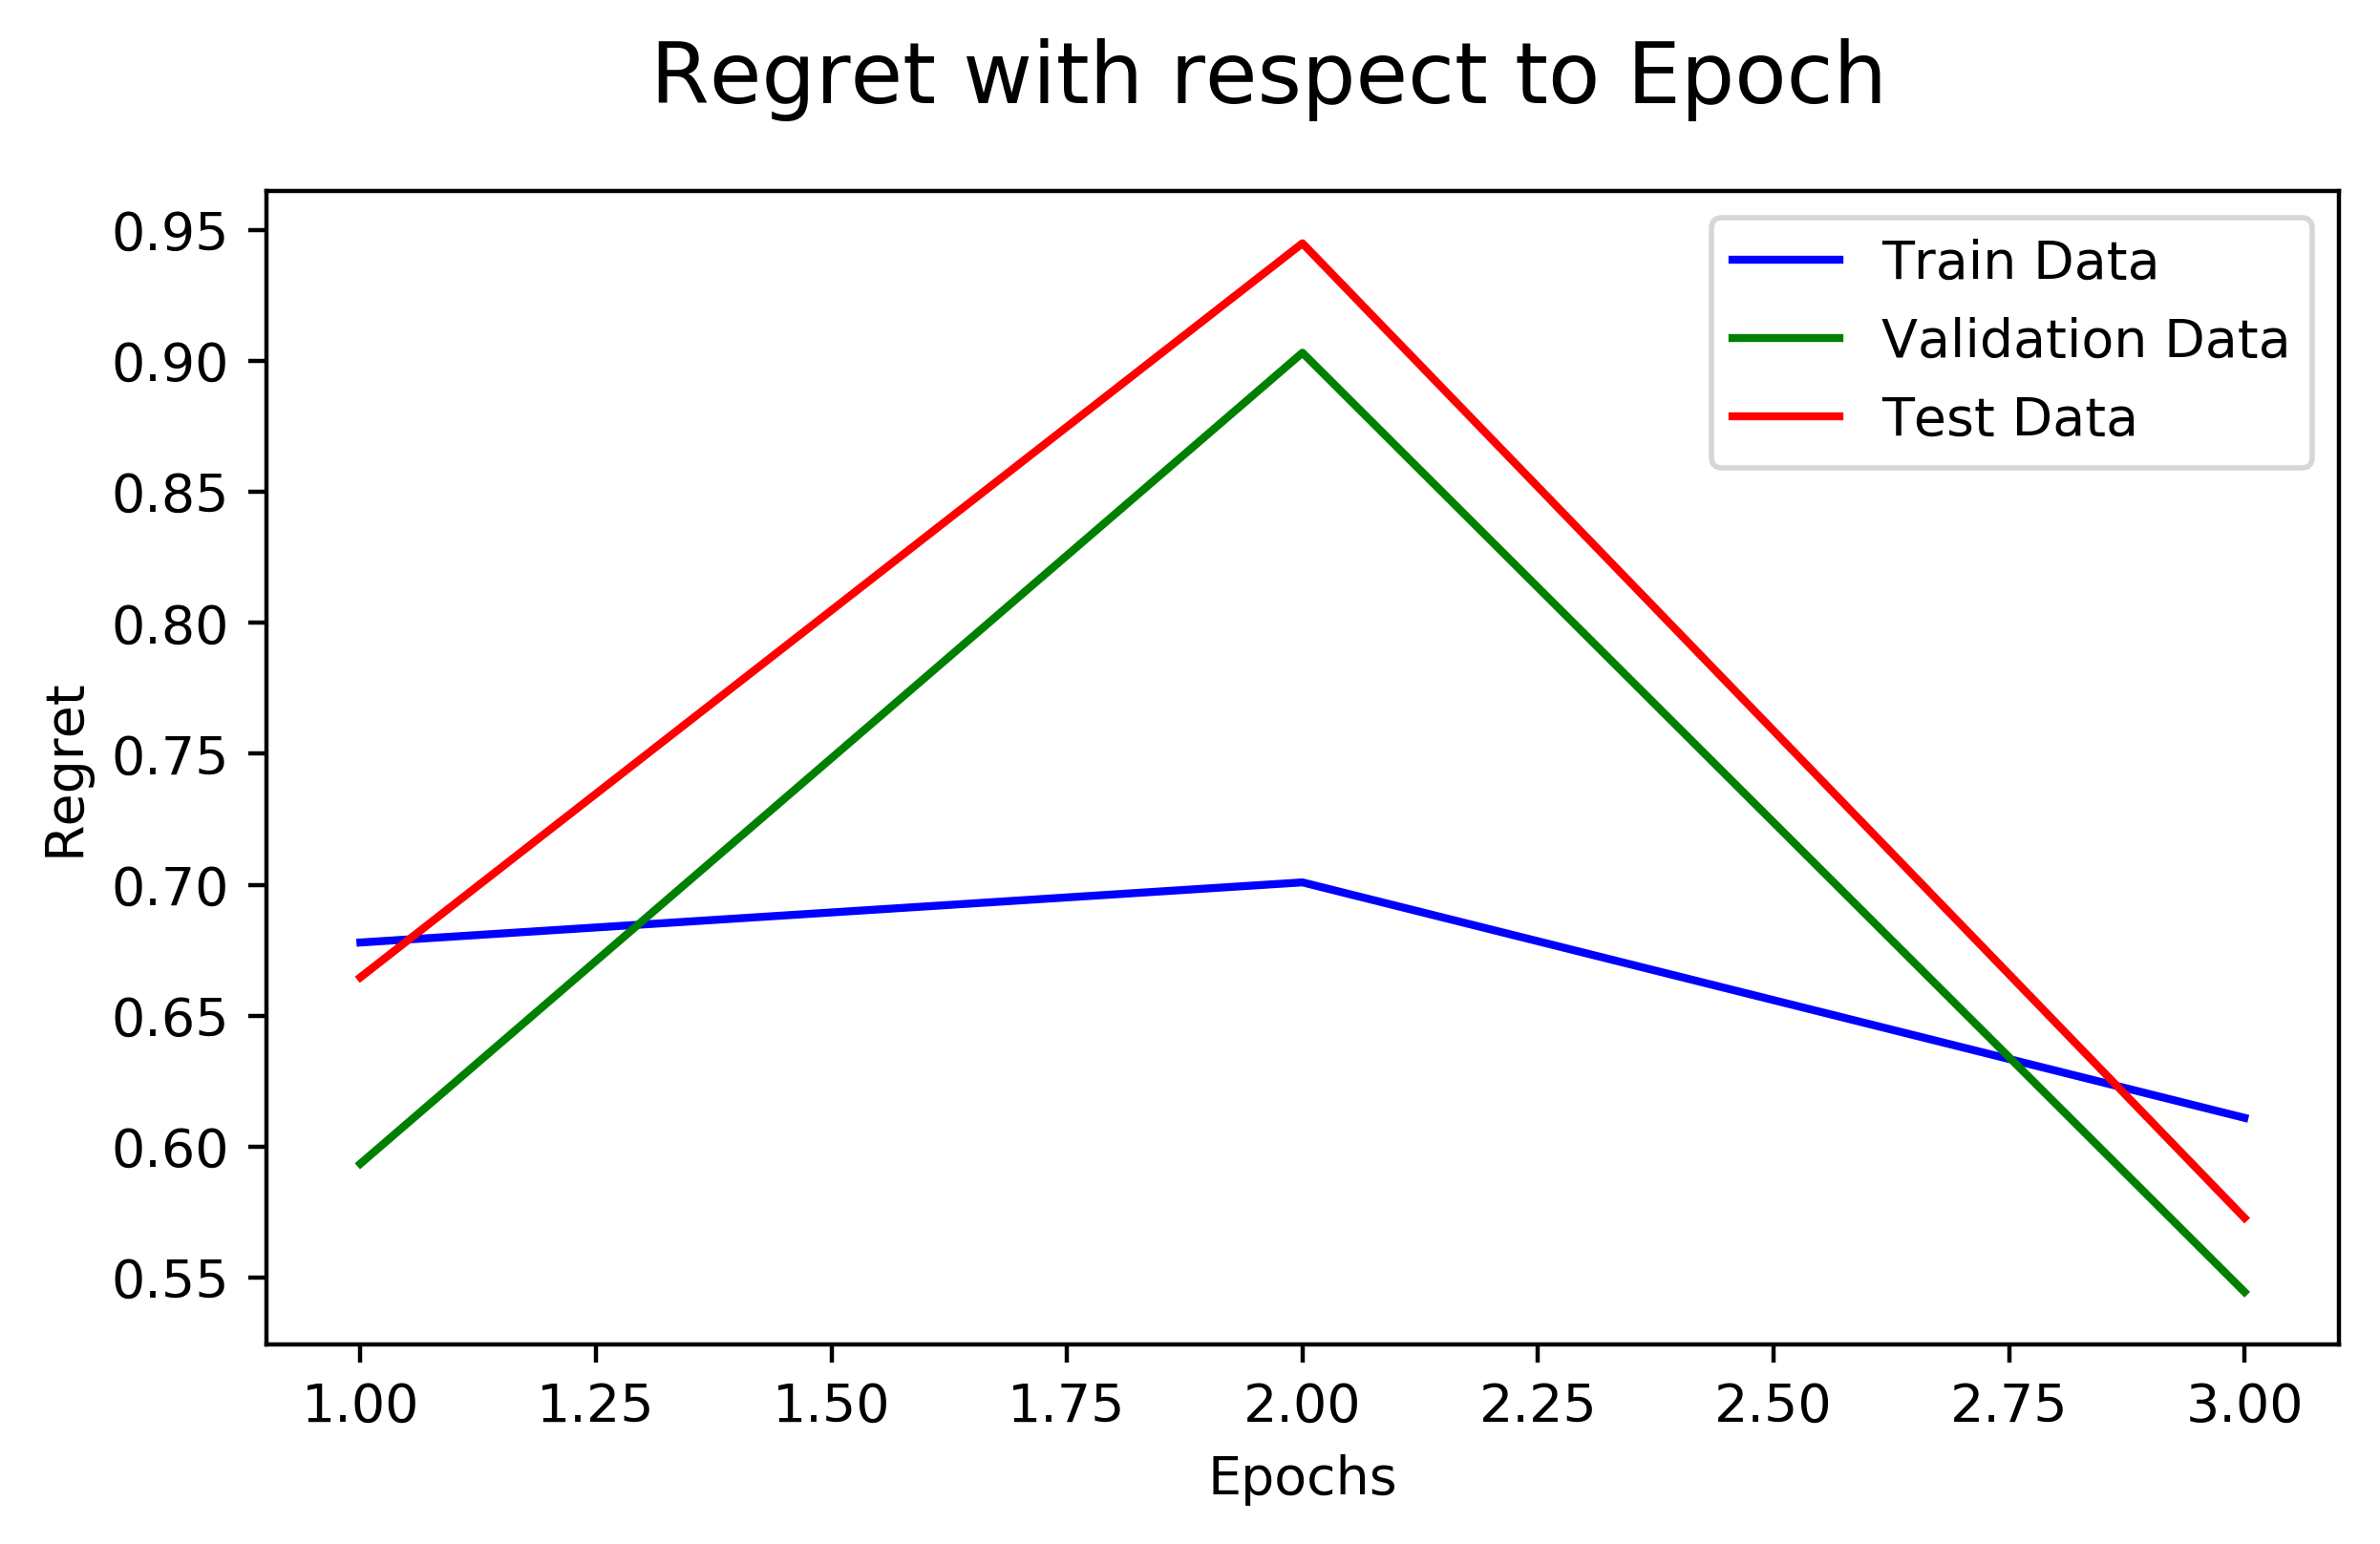

In [10]:
plt.figure(figsize=(7,4),dpi=400)
# plain CNN
ax = plt.subplot(1,1,1)
regret_train_plot, = ax.plot(epoch_ind,train_regret_epoch_array,'b-')
regret_valid_plot, = ax.plot(epoch_ind,valid_regret_epoch_array,'g-')
regret_test_plot, = ax.plot(epoch_ind,test_regret_epoch_array,'r-')
ax.legend([regret_train_plot,regret_valid_plot,regret_test_plot],['Train Data','Validation Data','Test Data'])
ax.set_xlabel('Epochs')
ax.set_ylabel('Regret')
plt.suptitle('Regret with respect to Epoch',fontsize=16)
plt.show()

## Plot the confusion matrix

In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Greens'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Trends")
    plt.ylabel("True Trends")

    fmt = '.0f'
    thresh = cm.max()/1.2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

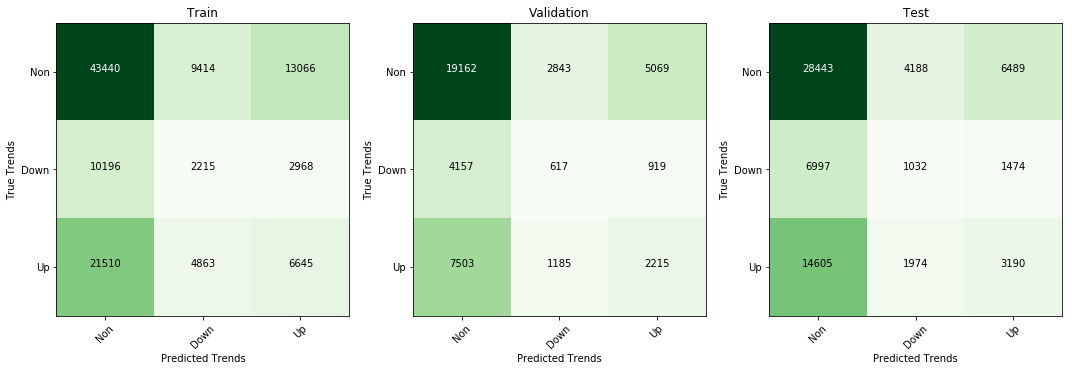

In [12]:
plt.figure(figsize=(15,7))
# first group of examples
ax = plt.subplot(1,3,1)
plot_confusion_matrix(save_class_matrix_train,['Non','Down','Up'],title='Train')
ax = plt.subplot(1,3,2)
plot_confusion_matrix(save_class_matrix_valid,['Non','Down','Up'],title='Validation')
ax = plt.subplot(1,3,3)
plot_confusion_matrix(save_class_matrix_test,['Non','Down','Up'],title='Test')
plt.show()